AC Coupled Amplifier
====================

This example shows the simulation of an AC coupled amplifier using a NPN
bipolar transistor.


In [1]:


import matplotlib.pyplot as plt


import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *


libraries_path = find_libraries()
spice_library = SpiceLibrary(libraries_path)




2022-08-15 01:41:10,032 - PySpice.Doc.ExampleTools - ExampleTools.INFO - SPICE library path is D:\MiniConda\lib\libraries


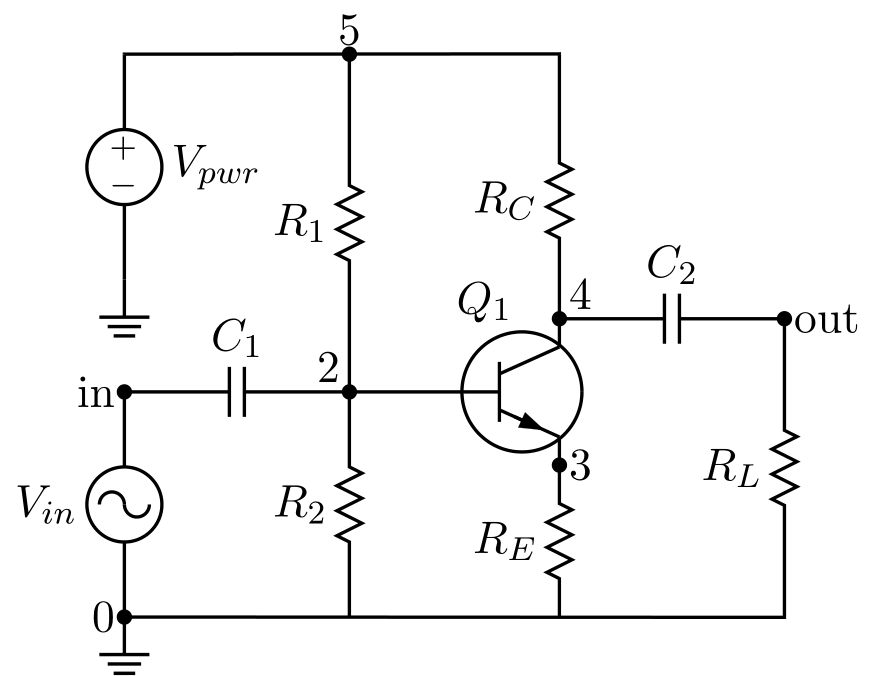

2022-08-15 01:41:10,066 - PySpice.Spice.Netlist.Node - Netlist.WARNING - Node name 'in' is a Python keyword


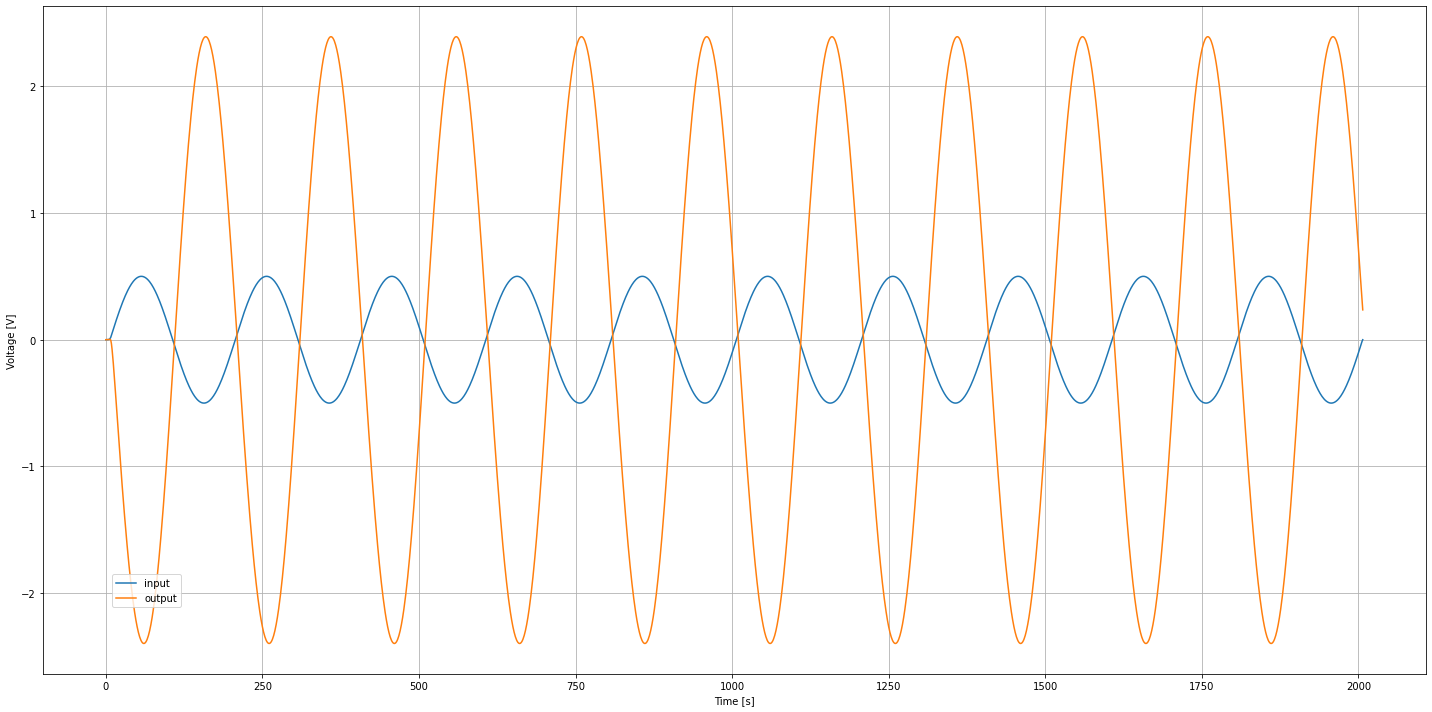

In [2]:

circuit = Circuit('Transistor')

circuit.V('power', 5, circuit.gnd, 15@u_V)
source = circuit.SinusoidalVoltageSource('in', 'in', circuit.gnd, amplitude=.5@u_V, frequency=500@u_kHz)
circuit.C(1, 'in', 2, 10@u_uF)
circuit.R(1, 5, 2, 100@u_kΩ)
circuit.R(2, 2, 0, 20@u_kΩ)
circuit.R('C', 5, 4, 10@u_kΩ)
circuit.BJT(1, 4, 2, 3, model='bjt') 
circuit.model('bjt', 'npn', bf=80, cjc=pico(5), rb=100)
circuit.R('E', 3, 0, 2@u_kΩ)
circuit.C(2, 4, 'out', 10@u_uF)
circuit.R('Load', 'out', 0, 1@u_MΩ)


figure, ax = plt.subplots(figsize=(20, 10))

# .ac dec 5 10m 1G

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=source.period/200, end_time=source.period*10)

ax.set_title('')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Voltage [V]')
ax.grid()
ax.plot(analysis['in'])
ax.plot(analysis.out)
ax.legend(('input', 'output'), loc=(.05,.1))

plt.tight_layout()

